In [1]:
import os

os.chdir('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [6]:
houses = pd.read_csv('Datasets/houses.csv')
X = houses.drop(['id','price','yr_built','yr_renovated'], axis = 1)
y = houses.price

In [7]:
from sklearn.model_selection import train_test_split
y_binned = pd.qcut(y, q = 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                 train_size = 0.7, 
                 random_state = 617)

In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=617, 
                             max_depth=8)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=617)

In [32]:
from sklearn.metrics import root_mean_squared_error
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)
print('Train RMSE:', root_mean_squared_error(y_train, pred_train))
print('Test RMSE: ', root_mean_squared_error(y_test, pred_test))

Train RMSE: 170924.92011001377
Test RMSE:  207232.83168090417


In [34]:
import time

In [36]:
# Model Tuning
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=617)
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 617,
 'splitter': 'best'}

In [37]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12],
             'min_samples_leaf':[5, 10,20,40, 100, 150,200],
             'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
tune_tree = GridSearchCV(estimator=tree,
                         param_grid=param_grid, 
                         cv = 5,
                         scoring = 'neg_root_mean_squared_error', 
                         n_jobs = -1)
tune_tree.fit(X_train, y_train)

c:\Users\athar\anaconda4\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: total: 10.7 s
Wall time: 29.6 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=617), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12],
                         'min_samples_leaf': [5, 10, 20, 40, 100, 150, 200]},
             scoring='neg_root_mean_squared_error')

In [38]:
pd.DataFrame(tune_tree.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026703,0.006781,0.005648,0.001291,2,1,5,"{'max_depth': 2, 'max_features': 1, 'min_sampl...",-254362.983031,-284079.85645,-304301.432056,-315944.346308,-306286.30315,-292994.984199,21922.952177,918
1,0.023233,0.002921,0.004741,0.000985,2,1,10,"{'max_depth': 2, 'max_features': 1, 'min_sampl...",-254362.983031,-284079.85645,-304301.432056,-315944.346308,-306286.30315,-292994.984199,21922.952177,918
2,0.024036,0.001686,0.005507,0.000797,2,1,20,"{'max_depth': 2, 'max_features': 1, 'min_sampl...",-254362.983031,-284079.85645,-304301.432056,-315944.346308,-306286.30315,-292994.984199,21922.952177,918
3,0.014380,0.002600,0.002799,0.001123,2,1,40,"{'max_depth': 2, 'max_features': 1, 'min_sampl...",-254362.983031,-284079.85645,-304301.432056,-315944.346308,-306286.30315,-292994.984199,21922.952177,918
4,0.011426,0.002112,0.004397,0.001368,2,1,100,"{'max_depth': 2, 'max_features': 1, 'min_sampl...",-254362.983031,-284079.85645,-304301.432056,-315944.346308,-306286.30315,-292994.984199,21922.952177,918


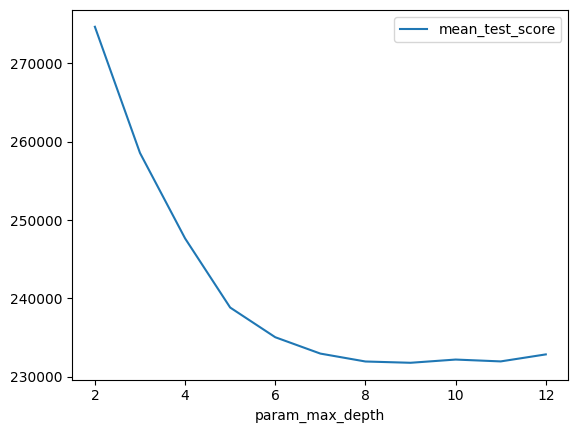

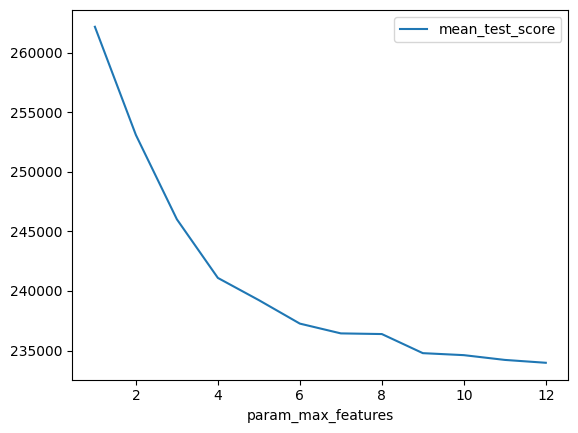

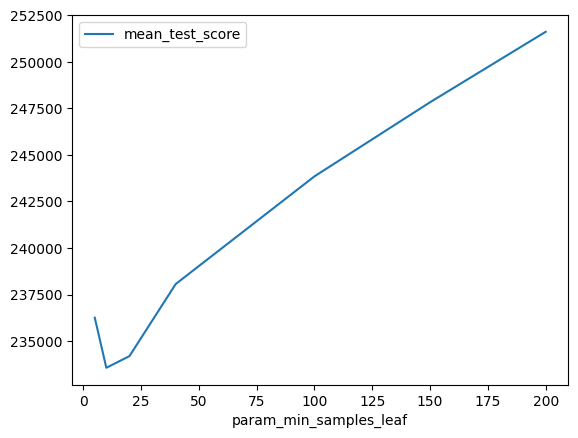

In [39]:
cv_values = pd.DataFrame(tune_tree.cv_results_)
cv_values.mean_test_score = cv_values.mean_test_score*(-1)
cv_values[['param_max_depth', 'mean_test_score']].groupby('param_max_depth').mean().plot()
cv_values[['param_max_features', 'mean_test_score']].groupby('param_max_features').mean().plot()
cv_values[['param_min_samples_leaf', 'mean_test_score']].groupby('param_min_samples_leaf').mean().plot()
plt.show()

In [40]:
cv_values[['param_max_depth','param_max_features','param_min_samples_leaf','mean_test_score']].\
sort_values('mean_test_score', ascending=True).head(15)

,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
554,8,8,10,213674.331056
568,8,10,10,214237.151136
561,8,9,10,214418.667783
659,9,11,10,214508.588761
484,7,10,10,214810.494485
582,8,12,10,214944.939856
575,8,11,10,215219.393191
477,7,9,10,215254.942020
666,9,12,10,215439.016347
645,9,9,10,215469.019781


In [41]:
tune_tree.best_params_

{'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 10}

In [42]:
best_tree = tune_tree.best_estimator_

In [43]:
- tune_tree.best_score_

213674.33105550436

In [44]:
from sklearn.metrics import root_mean_squared_error
pred_train = best_tree.predict(X_train)
pred_test = best_tree.predict(X_test)
print('Train RMSE: ', root_mean_squared_error(y_train, pred_train))
print('Test RMSE: ', root_mean_squared_error(y_test, pred_test))

Train RMSE:  187978.7989350463
Test RMSE:  214850.38735279258


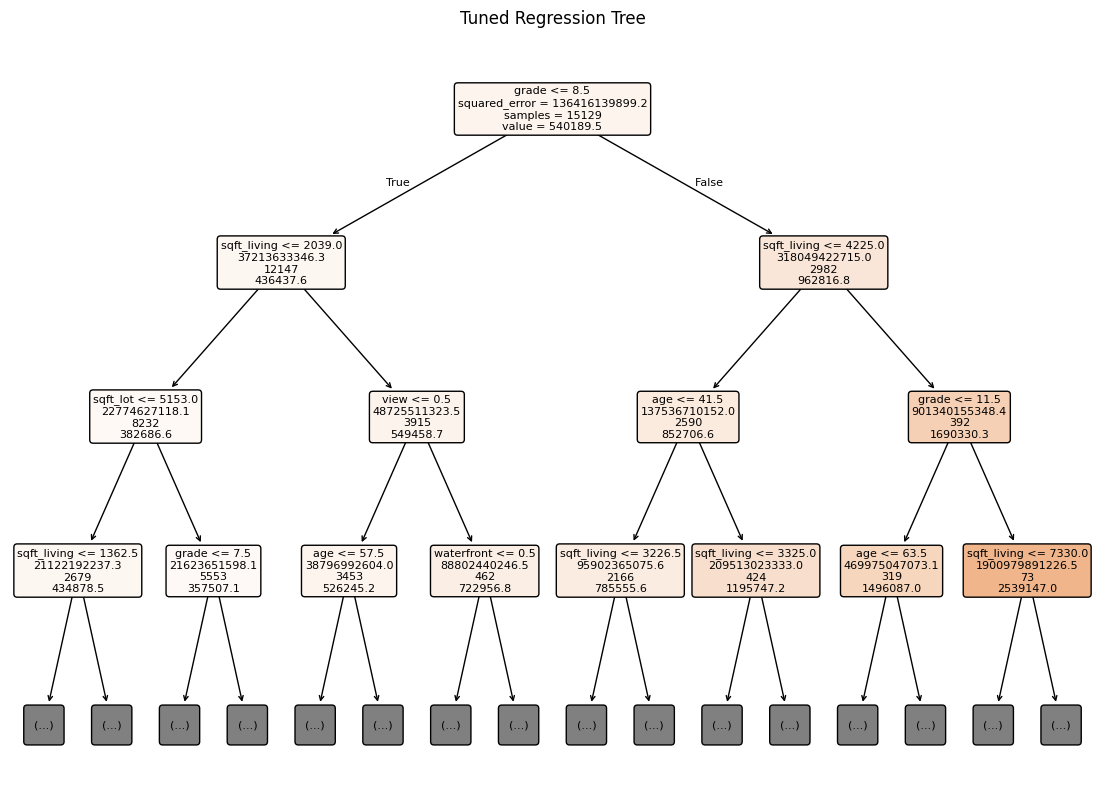

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 10))
plot_tree(best_tree, 
          feature_names=X.columns,
          label = 'root', 
          filled=True,
          fontsize=8,
          rounded = True, 
          precision = 1,
          node_ids=False, 
          max_depth = 3)
plt.title("Tuned Regression Tree")
plt.show()

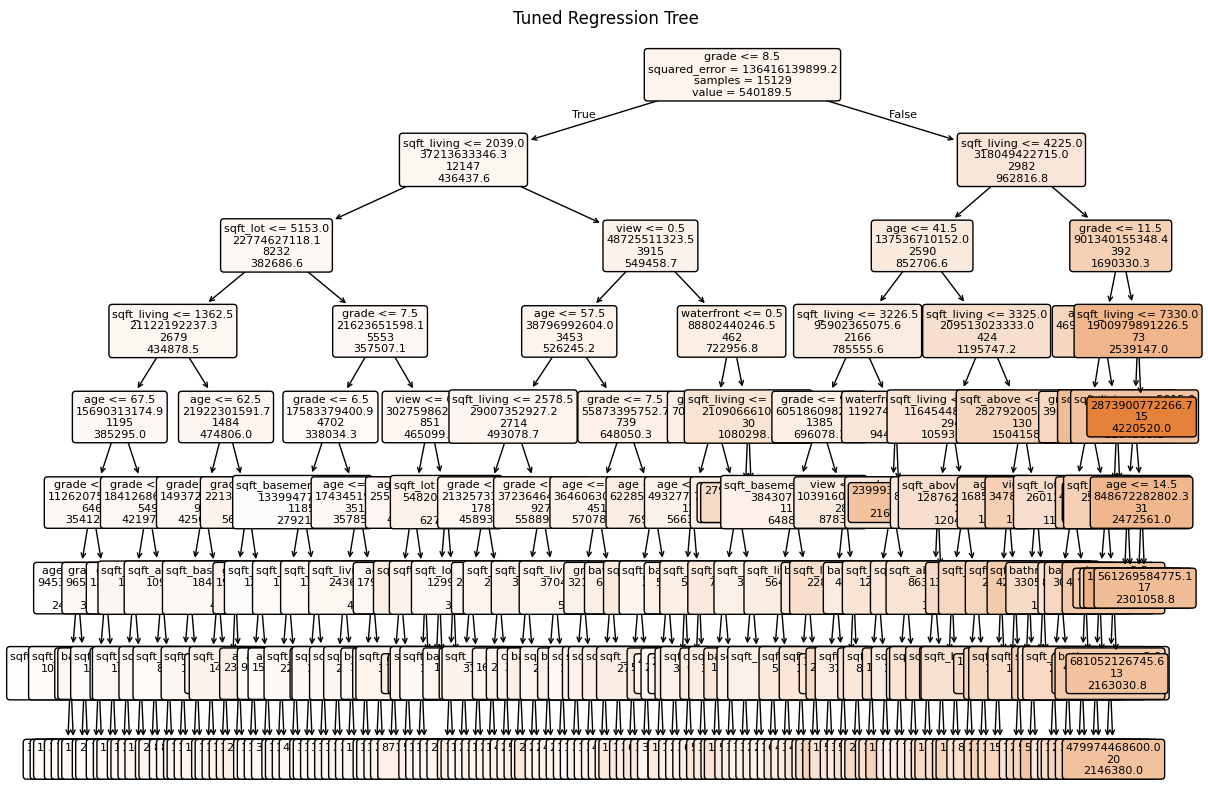

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 10))
plot_tree(best_tree, 
          feature_names=X.columns,
          label = 'root', 
          filled=True,
          fontsize=8,
          rounded = True, 
          precision = 1,
          node_ids=False)
plt.title("Tuned Regression Tree")
plt.show()

In [56]:
dream_house=pd.DataFrame({
    'bedrooms':[5],
    'bathrooms':[3],
    'sqft_living':[6000],
    'sqft_lot':[12000],
    'floors':[1],
    'waterfront':[0],
    'view':[1],
    'condition':[10],
    'grade':[3],
    'sqft_above':[6000],
    'sqft_basement':[0],
    'age':[10]
})

In [57]:
best_tree.predict(dream_house)

array([491925.])

In [63]:
pd.DataFrame({'Importance':best_tree.feature_importances_,'Feature':best_tree.feature_names_in_})

,Importance,Feature
0,0.000933,bedrooms
1,0.009651,bathrooms
2,0.305536,sqft_living
3,0.021162,sqft_lot
4,0.000246,floors
5,0.012565,waterfront
6,0.023360,view
7,0.001132,condition
8,0.530197,grade
9,0.006911,sqft_above
